# Tests

In [1]:
from discopy.drawing import draw
from discopy.quantum.zx import Z, X, Id, SWAP
from discopy.quantum.rewrite_qaoa import simplify_qaoa
from sympy.abc import phi, beta


def get_beginning(symbol):
    diagram = Z(0, 1) @ Z(0, 1) @ Z(0, 1) @ Z(0, 1)
    diagram = diagram >> Z(1, 2) @ Id(1) @ Z(1, 3) @ Id(1)
    diagram = diagram >> Id(1) @ X(1, 2) @ Id(1) @ X(1, 2) @ Id(1) @ X(1, 2) @ Id(1)
    diagram = diagram >> Id(7) @ Z(1, 0, symbol) @ Z(2, 2)
    diagram = diagram >> Id(7) @ X(1, 2) @ Id(1)
    diagram = diagram >> Id(1) @ Z(1, 0, symbol) @ Id(3) @ Z(1, 0, symbol) @ SWAP @ Z(
        1, 0, symbol
    ) @ Id(1)
    return diagram >> Id(1) @ Z(4, 1) @ Id(2) >> Z(1, 1) @ Z(1, 1) @ Z(1, 1) @ Z(1, 1)


def get_middle(symbol):
    middle_part = (
        X(1, 1, -symbol) @ X(1, 1, -symbol) @ X(1, 1, -symbol) @ X(1, 1, -symbol)
    )
    middle_part = middle_part >> Id(1) @ Z(1, 1, phase=0.5) @ Z(1, 1, phase=0.5) @ Id(1)
    middle_part = middle_part >> X(1, 1, symbol) @ X(1, 1, symbol) @ X(
        1, 1, symbol
    ) @ X(1, 1, symbol)
    return middle_part


def get_graph(inner_symbol, outer_symbol):
    stageone = get_beginning(-outer_symbol)
    middle_part = get_middle(inner_symbol)
    diagram = stageone >> middle_part
    final_diag = (
        diagram
        >> SWAP @ SWAP
        >> Id(1) @ SWAP @ Id(1)
        >> SWAP @ SWAP
        >> Id(1) @ SWAP @ Id(1)
        >> get_beginning(outer_symbol).transpose()
    )
    return final_diag


candidates [(24, 21), (25, 22)]
edges_to_add [(21, 27), (24, 17), (22, 28), (25, 18)]
edges_to_remove [(24, 27), (21, 17), (25, 28), (22, 18)]
spider_simp: 10. 9. 6. 1.  4 iterations
id_simp: 3. 1.  2 iterations
Simplifying inner


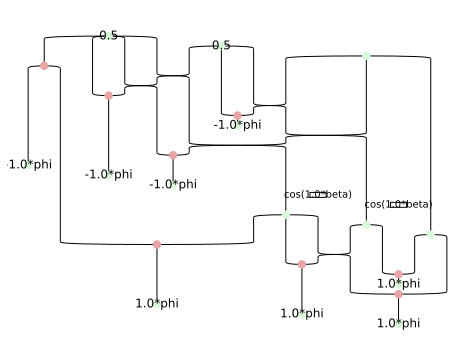

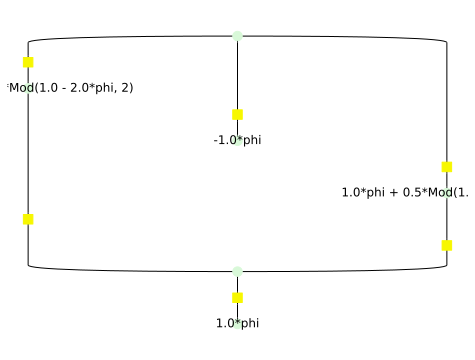

Starting


unspidering 6 with phase 2.0*phi + Mod(1.0 - 2.0*phi, 2)


unspidering 10 with phase 2.0*phi + Mod(1.0 - 2.0*phi, 2)


simplifying bialg rule


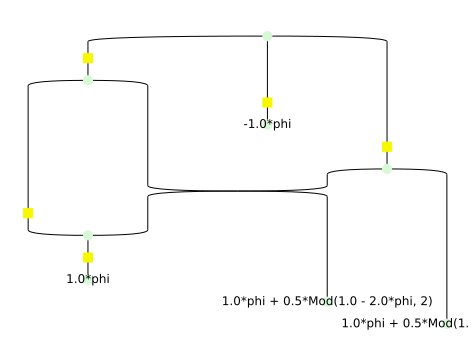

Simplifying inner


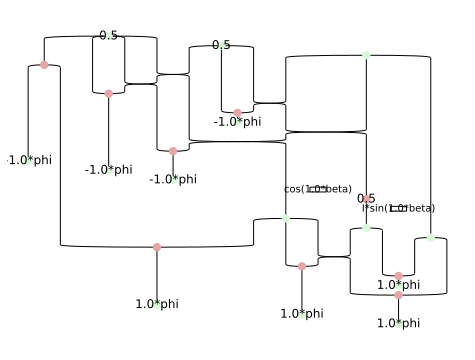

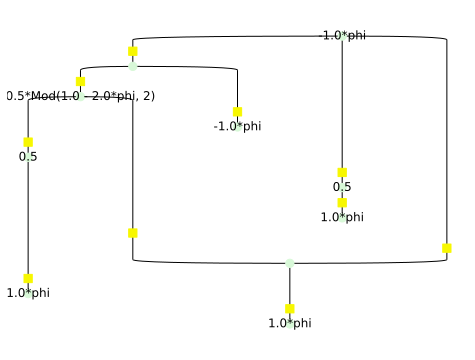

Starting


unspidering 6 with phase -2.0*phi


unspidering 9 with phase Mod(1.0 - 2.0*phi, 2)


simplifying bialg rule


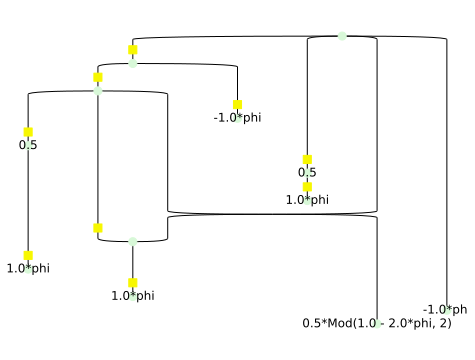

Simplifying inner


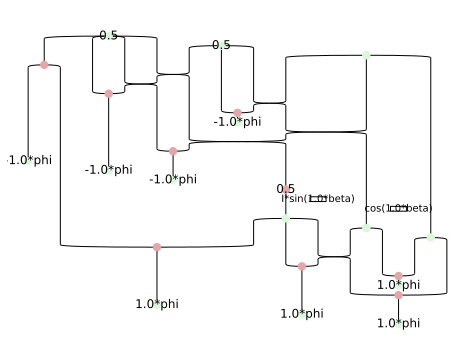

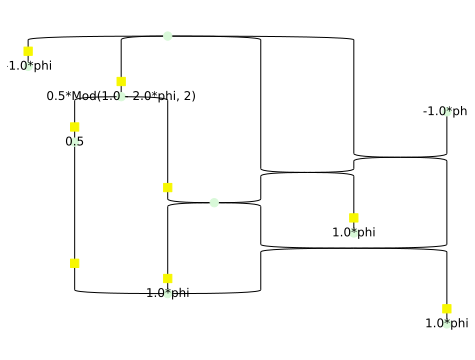

Starting


unspidering 9 with phase Mod(1.0 - 2.0*phi, 2)


unspidering 21 with phase 2.0*phi


simplifying bialg rule


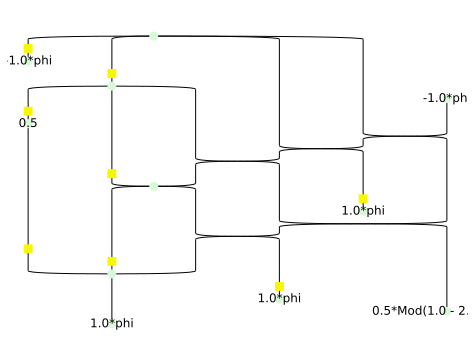

Simplifying inner


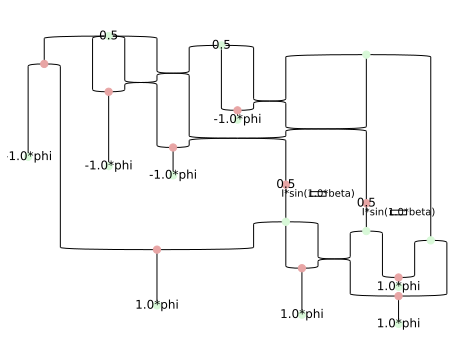

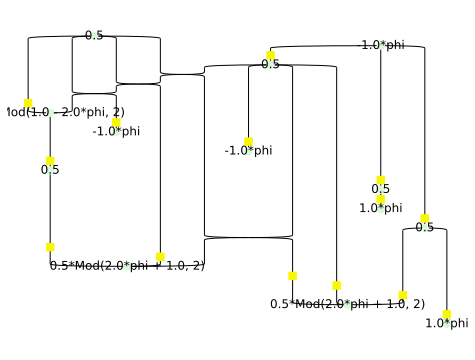

Starting


unspidering 6 with phase -2.0*phi


unspidering 8 with phase Mod(1.0 - 2.0*phi, 2)


unspidering 21 with phase Mod(2.0*phi + 1.0, 2)


unspidering 22 with phase Mod(2.0*phi + 1.0, 2)


simplifying bialg rule


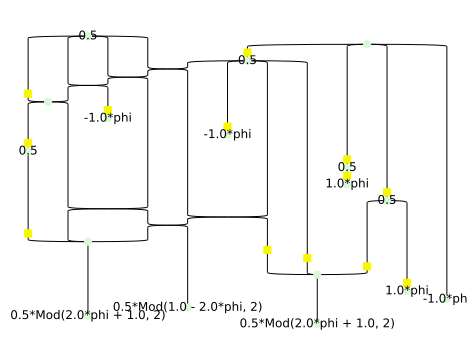

In [2]:
a = get_graph(beta, phi)

b = simplify_qaoa(a, beta, phi)